### Google Trends

#### 1. Install PyTrends

In [46]:
## Uncomment to install PyTrends package to retrieve Google Trends data
# !pip install pytrends


In [47]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import numpy as np
import datetime as dt
from datetime import date
from pytrends.request import TrendReq
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Notebook settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pytrends = TrendReq(hl='en-US', tz=360)
# sns.set_theme()

#### Retrieve Google Trends Data

In [54]:
kw_list = ['covid']
frequency = 'daily' # ie. hourly, weekly, monthly, yearly
geo = 'US'
hl='en-US'

# Select Start Date
year_start = 2020
month_start = 1
day_start=1
hour_start=0

# Select End Date
year_end=2022
month_end=5
day_end=15
hour_end=0

# Run PyTrends
google_trends = pytrends.get_historical_interest(kw_list,
                                 year_start = year_start, 
                                 month_start = month_start, 
                                 day_start = day_start, 
                                 hour_start = hour_start, 
                                 year_end = year_end, 
                                 month_end = month_end, 
                                 day_end = day_end, 
                                 hour_end = hour_end, 
                                 cat=0, 
                                 geo=geo, 
                                 gprop='', 
                                 sleep=0,
                                 frequency=frequency)


google_trends = google_trends.reset_index()
google_trends.columns = ['date', 'keyword','partial']
google_trends.drop(['partial'], axis=1, inplace=True)
pd.to_datetime(google_trends['date'])

google_trends.head()

,date,keyword
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0


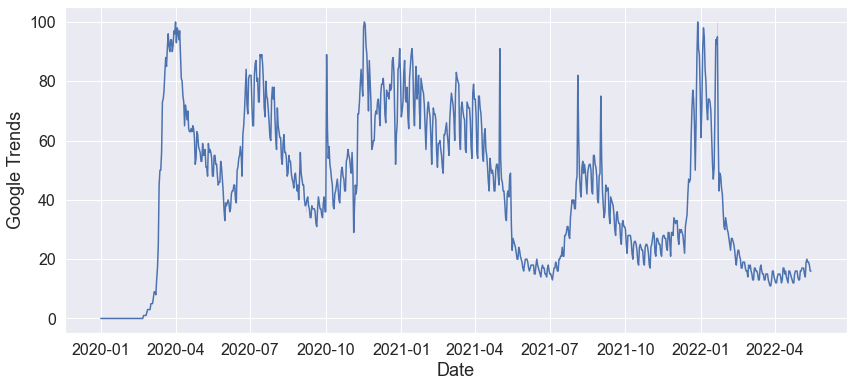

In [55]:
# Plot google trends over time
sns.set(rc={"figure.figsize":(14, 6)})

sns.lineplot(data=google_trends, x='date', y='keyword')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Google Trends', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig("google_trend_plot.png", dpi=360, bbox_inches='tight')
plt.show()

NumExpr defaulting to 8 threads.


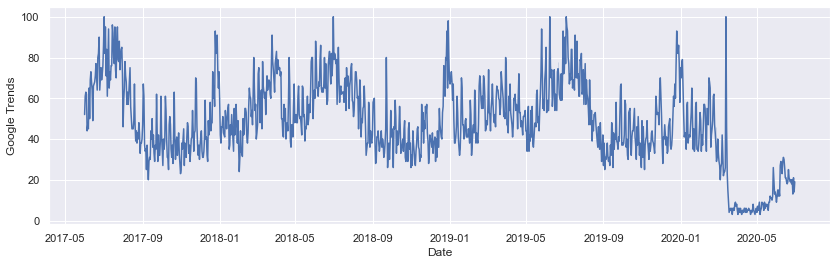

In [4]:
# Plot google trends over time
sns.set(rc={"figure.figsize":(14, 4)})

sns.lineplot(data=google_trends, x='date', y='keyword')
plt.xlabel('Date')
plt.ylabel('Google Trends')
# plt.savefig("google_trend_plot.jpg", dpi=360, bbox_inches='tight')
plt.show()

In [5]:
# Save Google Trends file
today = date.today()
d1 = today.strftime("%d-%m-%Y")
google_trends.to_csv('google_trends_'+kw_list[0]+'_'+ d1+'.csv')

### Google Trends Keywords Suggestion

In [6]:
# Get Google Keyword Suggestions
pytrend = TrendReq()
keywords = pytrend.suggestions(keyword='optum')
df = pd.DataFrame(keywords)
df.head(10)

,mid,title,type
0,/g/11h0vqn2y6,Optum,Healthcare company
1,/m/0_glh5p,OptumRx,Corporation
2,/g/11b7ch03q6,Optum,Topic
3,/g/1tmy59s1,Optum,Topic
4,/g/11lkzch080,Optum Store,Topic


### Dummy Variables

#### Federal Holidays

In [7]:
google_trends
google_trends.head()

,date,keyword
0,2017-06-01,52
1,2017-06-02,61
2,2017-06-03,63
3,2017-06-04,62
4,2017-06-05,44


In [8]:
cal = calendar()
holidays = cal.holidays(start = google_trends['date'].min(), end = google_trends['date'].max())
google_trends['holiday'] = google_trends['date'].isin(holidays)
google_trends['holiday'] = google_trends['holiday'].apply(lambda x: 1 if x == True else 0)
google_trends.head()

,date,keyword,holiday
0,2017-06-01,52,0
1,2017-06-02,61,0
2,2017-06-03,63,0
3,2017-06-04,62,0
4,2017-06-05,44,0


#### Day of the Week

In [9]:
# Getting the day of the week
google_trends['d'] = google_trends['date'].dt.dayofweek

# Creating is_weekday variable
google_trends['is_weekday'] = google_trends['d'].apply(lambda x: 1 if x != 5 and x !=6 else 0)

# Creating is_weekend variable
google_trends['is_weekend'] = google_trends['d'].apply(lambda x: 1 if x == 5 or x == 6 else 0)
google_trends.head()

,date,keyword,holiday,d,is_weekday,is_weekend
0,2017-06-01,52,0,3,1,0
1,2017-06-02,61,0,4,1,0
2,2017-06-03,63,0,5,0,1
3,2017-06-04,62,0,6,0,1
4,2017-06-05,44,0,0,1,0


In [10]:
google_trends['d'] = google_trends['d'].apply(lambda x: 'monday' if x == 0 else
                              'tuesday' if x == 1 else
                              'wednesday' if x == 2 else
                              'thursday' if x == 3 else
                              'friday' if x == 4 else
                              'saturday' if x == 5 else
                              'sunday' if x == 6
                    else x)

In [11]:
google_trends

,date,keyword,holiday,d,is_weekday,is_weekend
0,2017-06-01,52,0,thursday,1,0
1,2017-06-02,61,0,friday,1,0
2,2017-06-03,63,0,saturday,0,1
3,2017-06-04,62,0,sunday,0,1
4,2017-06-05,44,0,monday,1,0
...,...,...,...,...,...,...
1125,2020-06-26,20,0,friday,1,0
1126,2020-06-27,13,0,saturday,0,1
1127,2020-06-28,21,0,sunday,0,1
1128,2020-06-29,14,0,monday,1,0
